行为艺术聚类分析
正在加载数据: behavior_art_texts.txt
成功加载 271 条有效记录
正在提取特征并创建特征矩阵...


100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 434.20it/s]


特征矩阵形状: (239, 22) (作品数 × 特征维度)

=== 确定最优聚类数 ===
聚类数 2: 轮廓系数 = 0.1667
聚类数 3: 轮廓系数 = 0.1523
聚类数 4: 轮廓系数 = 0.1784
聚类数 5: 轮廓系数 = 0.2036
聚类数 6: 轮廓系数 = 0.1793
聚类数 7: 轮廓系数 = 0.1975
聚类数 8: 轮廓系数 = 0.2059


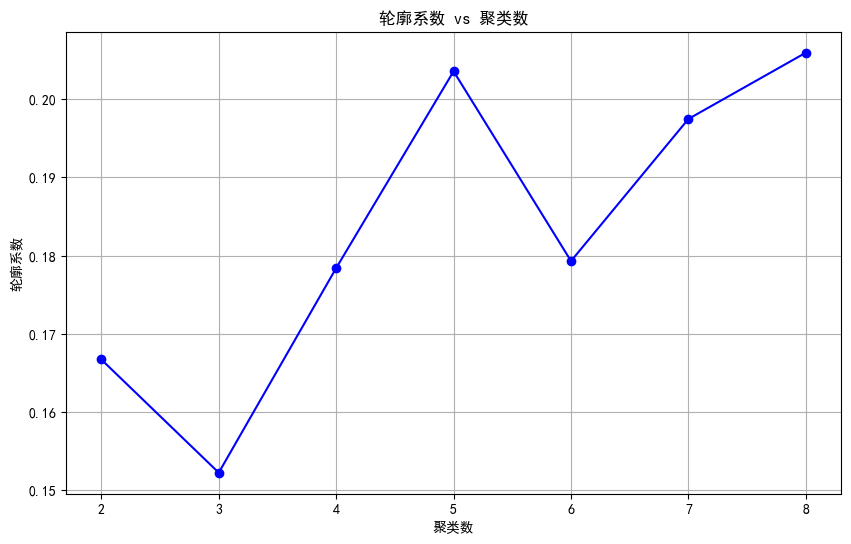

推荐聚类数: 8

使用聚类数: 4 (最优推荐: 8)

=== 执行K-means聚类 (n_clusters=4) ===
聚类轮廓系数: 0.0835

=== 聚类特征分析 ===

【仪式过程型】 (类别2)
  作品数量: 102 (42.7%)
  主要特征:
    - 时间_长时: 0.3639
    - 场所_画廊: 0.1632
    - 互动_参与: 0.1179
    - 社会_权力: 0.0691
    - 场所_公共: 0.0603

【社会批判型】 (类别0)
  作品数量: 67 (28.0%)
  主要特征:
    - 互动_观众: 0.3629
    - 互动_参与: 0.1134
    - 社会_政治: 0.0885
    - 时间_长时: 0.0710
    - 材料_日常: 0.0586

【身体探索型】 (类别1)
  作品数量: 66 (27.6%)
  主要特征:
    - 互动_参与: 0.3837
    - 身体_动作: 0.1243
    - 美学_重复: 0.1123
    - 时间_长时: 0.0808
    - 主题_环境: 0.0711

【关系互动型】 (类别3)
  作品数量: 4 (1.7%)
  主要特征:
    - 社会_经济: 0.4688
    - 时间_长时: 0.2188
    - 主题_身份: 0.1250
    - 社会_政治: 0.0625
    - 身体_动作: 0.0625

=== 聚类结果可视化 ===


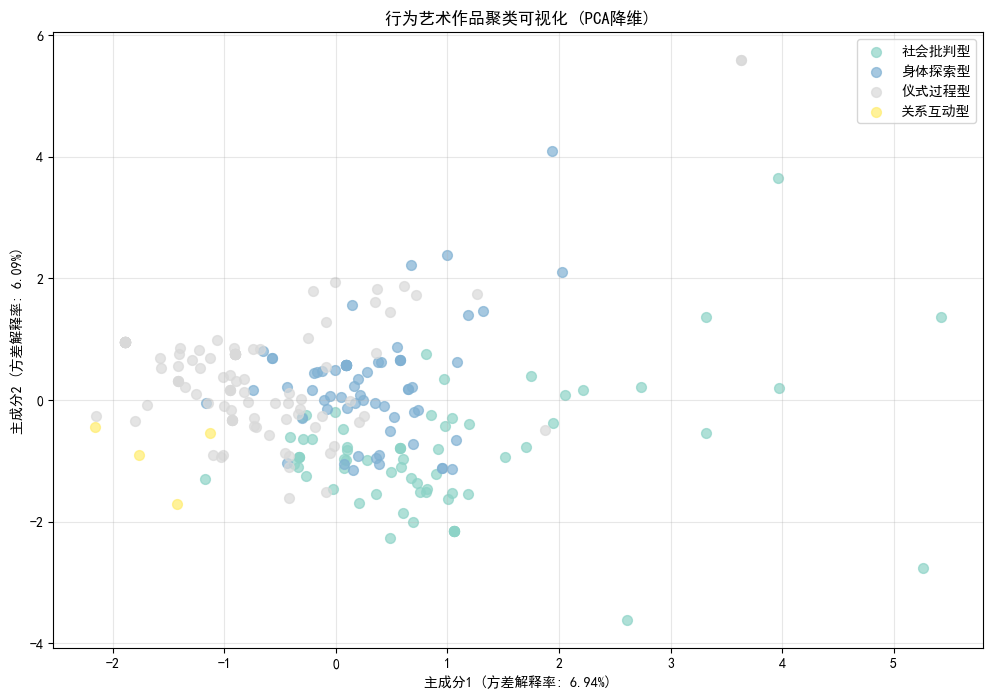

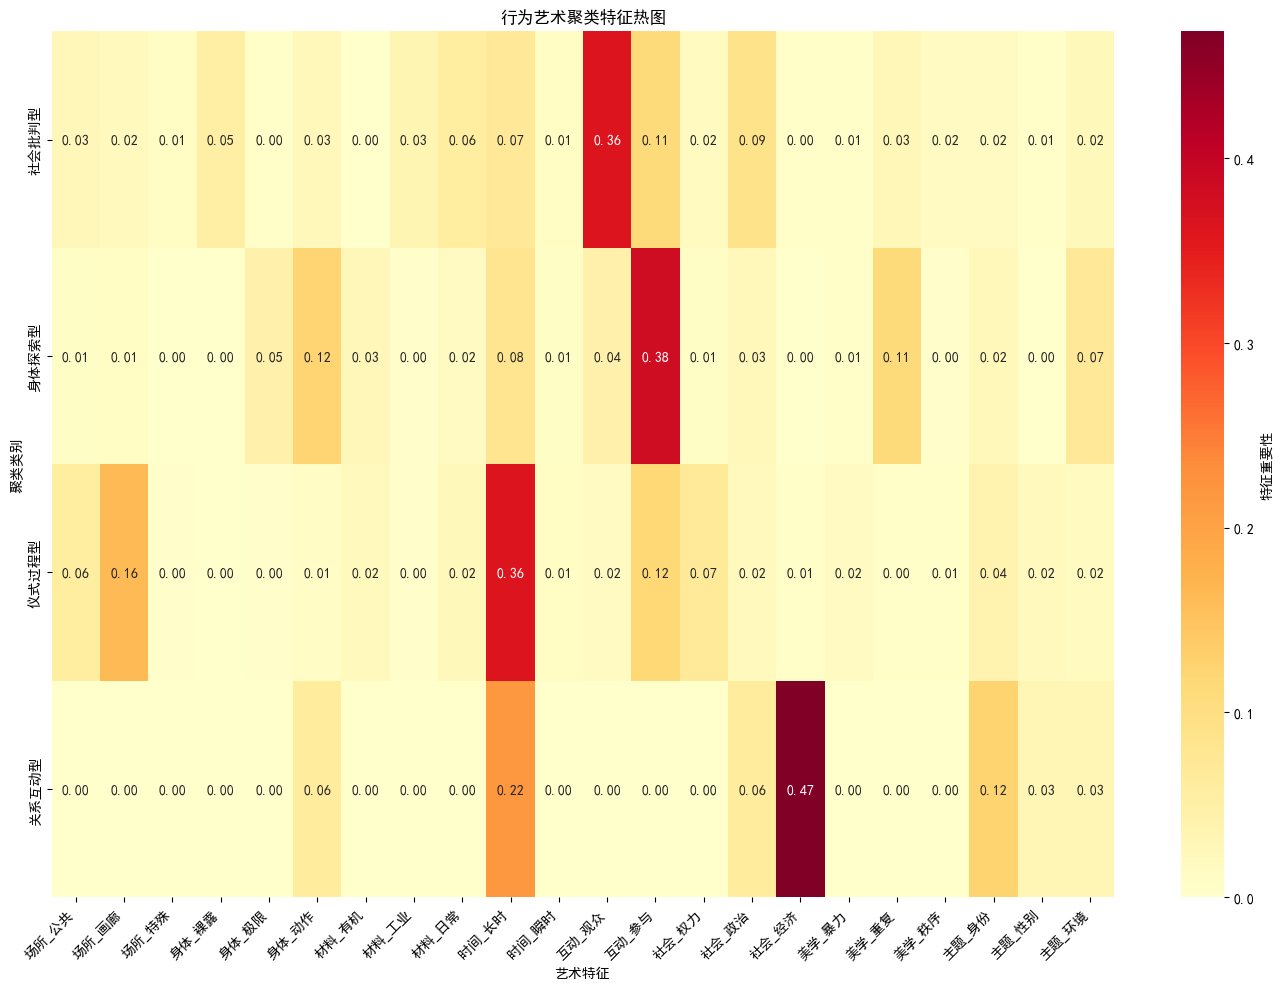


行为艺术聚类解读

✦ 仪式过程型 ✦
----------------------------------------
核心特征: 时间_长时, 场所_画廊, 互动_参与
作品数量: 102 (42.7%)
艺术解读: 这类行为艺术在公共空间进行社会政治批判，直接介入公共议题，具有较强的社会干预性。艺术家通过身体作为媒介，在权力机构的注视下挑战社会规范。
代表性作品:
  • 他举一在街上做行为例，找来许多纸箱，艺术家们先画些图像引起路人加入画，  找更多的纸箱，发展到用粉笔直接地上涂，警察也不能说什么,他们只是在地上画画。 最后移到了国会门前。做节日的理由，是让艺术家更多...
  • 希望在座的各位艺术家们继续努力，继续探索下去。阙正刚：各位前辈大家好，我是来自广州小洲艺术网的，我可能没有那些批评家 那么犀利的一个相对观点，来跟一些艺术家来探讨一些非常深刻问题。但我就我个人 的一些...
  • 演。认识他应该是七八年前的事了。我的学生Kelvin和一个朋友来了，我问为啥王文 国 (Marla Bendini) 没来，他们告诉我他在家扭伤了脚。美国艺术家Eric Scott Nelson从工地...


✦ 社会批判型 ✦
----------------------------------------
核心特征: 互动_观众, 互动_参与, 社会_政治
作品数量: 67 (28.0%)
艺术解读: 这类行为艺术主要关注社会、互动层面的表达，通过特定策略创造独特的艺术体验和社会意义。
代表性作品:
  • 自己家里就拥有个电台，家族很有势力，叔叔是议员。芭芭拉举着镜子，面粉散下来(其背藏面粉),面粉把场地弄脏。她将那双脚并 立地蹦着，脚印叠加在地板上；她不停地拍打着弹动的身子，激烈地摇头，摇散头发 中的...
  • 加在一起是 “Peace”     (和平),再翻个面用甜料在另一边重描一次，之后一个接一个 与对方相对舔吃其上的料。他那边是辣的，可见他一点点流泪与涨红了脸，这边的志 愿者相当配合，脸贴在透明的玻璃...
  • 就是客厅与厨房。对面是女人房 (Girl's), 所有的女艺术家住在一起。正好赶上阿 迪娜在做行为，她发出变化多端的嗓音，如歌如泣，委婉回荡。她走向观众发问：你 对你所住之地喜欢吗?只有一个人回答是真...


✦ 身体探索型 ✦


NameError: name 'results_df' is not defined

In [5]:
import pandas as pd
import numpy as np
import re
import jieba
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体支持
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

class BehaviorArtClusterAnalyzer:
    def __init__(self, n_clusters=4):
        """初始化聚类分析器"""
        self.n_clusters = n_clusters
        
        # 定义行为艺术特征词典
        self.behavior_tags = {
            '场所_公共': ['街头', '广场', '商场', '地铁', '车站', '公园', '公共空间', '城市'],
            '场所_画廊': ['画廊', '美术馆', '博物馆', '艺术中心', '展览', '展厅'],
            '场所_特殊': ['废墟', '工厂', '荒野', '山区', '水域', '乡村'],
            '身体_裸露': ['赤裸', '裸露', '裸体', '光着', '脱光', '不穿衣服'],
            '身体_极限': ['忍耐', '痛苦', '极限', '昏厥', '受伤', '流血', '疲惫'],
            '身体_动作': ['静坐', '站立', '行走', '奔跑', '跳跃', '爬行', '舞蹈'],
            '材料_有机': ['血液', '鲜血', '肉体', '动物', '植物', '食物', '毛发'],
            '材料_工业': ['水泥', '钢铁', '玻璃', '塑料', '陶瓷', '金属'],
            '材料_日常': ['衣服', '家具', '书籍', '纸张', '货币', '电子产品'],
            '时间_长时': ['小时', '天', '周', '月', '持续', '长期', '不间断'],
            '时间_瞬时': ['瞬间', '刹那', '立即', '突然', '爆发'],
            '互动_观众': ['观众', '路人', '围观', '观看', '见证', '目击'],
            '互动_参与': ['参与', '互动', '合作', '共同', '一起', '协助'],
            '社会_权力': ['警察', '保安', '政府', '官方', '干预', '禁止', '审查'],
            '社会_政治': ['政治', '权力', '自由', '民主', '抗议', '示威', '革命'],
            '社会_经济': ['消费', '商业', '资本', '金钱', '价格', '市场', '买卖'],
            '美学_暴力': ['暴力', '破坏', '摔碎', '切割', '撕裂', '毁坏'],
            '美学_重复': ['重复', '循环', '反复', '一次次', '不断'],
            '美学_秩序': ['整齐', '规律', '对称', '排列', '网格'],
            '主题_身份': ['身份', '自我', '个体', '个人', '认同'],
            '主题_性别': ['性别', '女性', '男性', '女权', '男权', '平等'],
            '主题_环境': ['环境', '自然', '生态', '污染', '保护', '地球']
        }
        
        # 反转词典，用于快速查找
        self.keyword_to_tag = {}
        for tag, keywords in self.behavior_tags.items():
            for keyword in keywords:
                self.keyword_to_tag[keyword] = tag
        
        # 聚类类别名称（根据分析结果动态更新）
        self.cluster_names = {
            0: "社会批判型",
            1: "身体探索型", 
            2: "仪式过程型",
            3: "关系互动型"
        }
    
    def load_text_data(self, file_path):
        """加载文本数据"""
        print(f"正在加载数据: {file_path}")
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # 清洗数据，去除空行和过短文本
        texts = [line.strip() for line in lines if len(line.strip()) > 10]
        print(f"成功加载 {len(texts)} 条有效记录")
        return texts
    
    def preprocess_text(self, text):
        """文本预处理"""
        # 去除特殊字符和数字，保留中文和基本标点
        text = re.sub(r'[^\u4e00-\u9fa5，。！？；：、\s]', '', text)
        # 分词
        words = jieba.lcut(text)
        return words
    
    def extract_features_from_text(self, text):
        """从文本中提取特征向量"""
        words = self.preprocess_text(text)
        
        # 初始化特征向量（每个标签一个维度）
        features = np.zeros(len(self.behavior_tags))
        
        # 将标签映射为索引
        tag_to_idx = {tag: i for i, tag in enumerate(self.behavior_tags.keys())}
        
        # 统计标签出现次数
        for word in words:
            if word in self.keyword_to_tag:
                tag = self.keyword_to_tag[word]
                features[tag_to_idx[tag]] += 1
        
        # 标准化为频率（防止长文本主导）
        total_tags = np.sum(features)
        if total_tags > 0:
            features = features / total_tags
        
        return features
    
    def create_feature_matrix(self, texts):
        """创建特征矩阵"""
        print("正在提取特征并创建特征矩阵...")
        
        features_list = []
        valid_indices = []
        
        for i, text in enumerate(tqdm(texts)):
            features = self.extract_features_from_text(text)
            
            # 只保留有足够特征的作品
            if np.sum(features) > 0:
                features_list.append(features)
                valid_indices.append(i)
        
        if len(features_list) == 0:
            print("警告：没有提取到有效的特征！")
            return None, None, None
        
        # 转换为特征矩阵
        X = np.array(features_list)
        
        print(f"特征矩阵形状: {X.shape} (作品数 × 特征维度)")
        return X, valid_indices, list(self.behavior_tags.keys())
    
    def determine_optimal_clusters(self, X, max_clusters=10):
        """使用轮廓系数确定最优聚类数"""
        print("\n=== 确定最优聚类数 ===")
        
        silhouette_scores = []
        cluster_range = range(2, min(max_clusters, len(X)) + 1)
        
        for n in cluster_range:
            kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X)
            
            if len(np.unique(cluster_labels)) > 1:
                score = silhouette_score(X, cluster_labels)
                silhouette_scores.append(score)
                print(f"聚类数 {n}: 轮廓系数 = {score:.4f}")
            else:
                silhouette_scores.append(0)
                print(f"聚类数 {n}: 无法计算轮廓系数")
        
        # 可视化轮廓系数
        plt.figure(figsize=(10, 6))
        plt.plot(list(cluster_range), silhouette_scores, 'bo-')
        plt.xlabel('聚类数')
        plt.ylabel('轮廓系数')
        plt.title('轮廓系数 vs 聚类数')
        plt.grid(True)
        plt.show()
        
        # 找到最优聚类数
        optimal_n = list(cluster_range)[np.argmax(silhouette_scores)]
        print(f"推荐聚类数: {optimal_n}")
        
        return optimal_n
    
    def perform_clustering(self, X, feature_names):
        """执行K-means聚类"""
        print(f"\n=== 执行K-means聚类 (n_clusters={self.n_clusters}) ===")
        
        # 标准化特征
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # 执行聚类
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        # 计算轮廓系数
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            print(f"聚类轮廓系数: {silhouette_avg:.4f}")
        
        # 获取聚类中心（原始特征空间）
        cluster_centers = kmeans.cluster_centers_
        
        return cluster_labels, cluster_centers, kmeans
    
    def analyze_cluster_characteristics(self, X, cluster_labels, feature_names):
        """分析每个聚类的特征"""
        print("\n=== 聚类特征分析 ===")
        
        # 创建聚类结果DataFrame
        results = []
        
        for cluster_id in range(self.n_clusters):
            # 获取属于该聚类的样本
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            
            if len(cluster_indices) == 0:
                continue
            
            # 计算该聚类中每个特征的平均值
            cluster_features = X[cluster_indices]
            feature_means = np.mean(cluster_features, axis=0)
            
            # 找到最重要的特征（top 5）
            top_feature_indices = np.argsort(feature_means)[-5:][::-1]
            top_features = [(feature_names[i], feature_means[i]) for i in top_feature_indices]
            
            # 统计信息
            cluster_info = {
                'cluster_id': cluster_id,
                'cluster_name': self.cluster_names.get(cluster_id, f"类别{cluster_id}"),
                'sample_count': len(cluster_indices),
                'percentage': len(cluster_indices) / len(X) * 100,
                'top_features': top_features
            }
            
            results.append(cluster_info)
        
        # 按样本数量排序
        results.sort(key=lambda x: x['sample_count'], reverse=True)
        
        # 打印聚类特征
        for cluster in results:
            print(f"\n【{cluster['cluster_name']}】 (类别{cluster['cluster_id']})")
            print(f"  作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            print("  主要特征:")
            for feature, score in cluster['top_features']:
                print(f"    - {feature}: {score:.4f}")
        
        return results
    
    def visualize_clusters(self, X, cluster_labels, feature_names):
        """可视化聚类结果"""
        print("\n=== 聚类结果可视化 ===")
        
        # 使用PCA降维到2D进行可视化
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
        
        # 创建可视化DataFrame
        df_viz = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'Cluster': cluster_labels
        })
        
        # 添加聚类名称
        df_viz['Cluster_Name'] = df_viz['Cluster'].apply(
            lambda x: self.cluster_names.get(x, f"类别{x}")
        )
        
        # 绘制散点图
        plt.figure(figsize=(12, 8))
        
        # 为每个聚类使用不同的颜色
        unique_clusters = sorted(df_viz['Cluster'].unique())
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))
        
        for i, cluster_id in enumerate(unique_clusters):
            cluster_data = df_viz[df_viz['Cluster'] == cluster_id]
            cluster_name = self.cluster_names.get(cluster_id, f"类别{cluster_id}")
            
            plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                       c=[colors[i]], label=cluster_name, alpha=0.7, s=50)
        
        plt.xlabel(f'主成分1 (方差解释率: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'主成分2 (方差解释率: {pca.explained_variance_ratio_[1]:.2%})')
        plt.title('行为艺术作品聚类可视化 (PCA降维)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 绘制特征热图（每个聚类的平均特征）
        plt.figure(figsize=(14, 10))
        
        # 计算每个聚类的特征平均值
        cluster_means = []
        for cluster_id in range(self.n_clusters):
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            if len(cluster_indices) > 0:
                cluster_mean = np.mean(X[cluster_indices], axis=0)
                cluster_means.append(cluster_mean)
        
        # 创建热图DataFrame
        heatmap_data = pd.DataFrame(
            cluster_means,
            index=[self.cluster_names.get(i, f"类别{i}") for i in range(self.n_clusters)],
            columns=feature_names
        )
        
        # 绘制热图
        sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f', 
                   cbar_kws={'label': '特征重要性'})
        plt.title('行为艺术聚类特征热图')
        plt.xlabel('艺术特征')
        plt.ylabel('聚类类别')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return df_viz
    
    def interpret_clusters(self, cluster_results, texts, valid_indices, cluster_labels):
        """解读聚类结果并提供艺术分析"""
        print("\n" + "="*60)
        print("行为艺术聚类解读")
        print("="*60)
        
        for cluster in cluster_results:
            cluster_id = cluster['cluster_id']
            cluster_name = cluster['cluster_name']
            
            print(f"\n✦ {cluster_name} ✦")
            print("-" * 40)
            print(f"核心特征: {', '.join([f[0] for f in cluster['top_features'][:3]])}")
            print(f"作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            
            # 艺术解读
            interpretation = self.cluster_interpretation(cluster_id, cluster['top_features'])
            print(f"艺术解读: {interpretation}")
            
            # 展示代表性作品（如果有原始文本）
            if texts and valid_indices:
                # 找到属于该聚类的作品索引
                cluster_mask = cluster_labels == cluster_id
                cluster_original_indices = [valid_indices[i] for i in range(len(cluster_labels)) 
                                          if cluster_mask[i]]
                
                if cluster_original_indices:
                    # 随机选择3个代表性作品展示
                    sample_indices = np.random.choice(cluster_original_indices, 
                                                     min(3, len(cluster_original_indices)), 
                                                     replace=False)
                    
                    print("代表性作品:")
                    for idx in sample_indices:
                        text_preview = texts[idx][:100] + "..." if len(texts[idx]) > 100 else texts[idx]
                        print(f"  • {text_preview}")
            
            print()
    
    def cluster_interpretation(self, cluster_id, top_features):
        """根据聚类特征提供艺术解读"""
        feature_names = [f[0] for f in top_features]
        
        # 基于特征组合提供解读
        if '社会_权力' in feature_names or '社会_政治' in feature_names:
            if '场所_公共' in feature_names:
                return "这类行为艺术在公共空间进行社会政治批判，直接介入公共议题，具有较强的社会干预性。艺术家通过身体作为媒介，在权力机构的注视下挑战社会规范。"
            elif '身体_裸露' in feature_names:
                return "通过身体的暴露与政治议题的结合，这类作品探讨身体政治与权力结构的关系，强调个体在政治语境中的脆弱性与抵抗。"
        
        if '身体_极限' in feature_names and '时间_长时' in feature_names:
            if '美学_重复' in feature_names:
                return "通过长时间的、重复性的身体极限体验，这类作品创造出一种仪式感，挑战身体的边界与忍耐力，具有强烈的精神性和哲学意味。"
            elif '材料_有机' in feature_names:
                return "将身体极限与有机材料结合，强调生命的脆弱性、物质的转化过程，以及身体与自然物质的互动关系。"
        
        if '互动_参与' in feature_names or '互动_观众' in feature_names:
            if '主题_身份' in feature_names:
                return "这类作品强调观众参与和互动，通过共同创作探讨个体与集体的身份认同问题，具有社会建构性和关系美学特征。"
            elif '场所_画廊' in feature_names:
                return "在制度化的艺术空间内邀请观众参与，这类作品挑战传统的观看关系，将艺术创作过程开放给公众，具有参与式民主的意味。"
        
        if '美学_秩序' in feature_names or '美学_重复' in feature_names:
            if '时间_长时' in feature_names:
                return "通过有序的、重复的行为模式与长时间的持续，这类作品创造出一种近乎宗教仪式的体验，强调过程的意义而非结果。"
        
        if '主题_环境' in feature_names and '场所_特殊' in feature_names:
            return "在特定自然环境中进行的生态主题行为艺术，强调人类与自然的关系，具有生态批评和环保主义色彩。"
        
        # 默认解读
        feature_categories = {
            '社会': [f for f in feature_names if f.startswith('社会_')],
            '身体': [f for f in feature_names if f.startswith('身体_')],
            '互动': [f for f in feature_names if f.startswith('互动_')],
            '主题': [f for f in feature_names if f.startswith('主题_')],
        }
        
        main_categories = [k for k, v in feature_categories.items() if v]
        if main_categories:
            categories_str = '、'.join(main_categories)
            return f"这类行为艺术主要关注{categories_str}层面的表达，通过特定策略创造独特的艺术体验和社会意义。"
        else:
            return "这类行为艺术具有独特的创作特征，通过特定的行为策略表达艺术家的观念与思考。"
    
    def save_clustering_results(self, texts, valid_indices, cluster_labels, feature_names, output_file="clustering_results.csv"):
        """保存聚类结果到CSV文件"""
        print(f"\n正在保存聚类结果到 {output_file}...")
        
        results_data = []
        for i, cluster_id in enumerate(cluster_labels):
            original_idx = valid_indices[i]
            results_data.append({
                'original_index': original_idx,
                'text': texts[original_idx] if texts else "",
                'cluster_id': cluster_id,
                'cluster_name': self.cluster_names.get(cluster_id, f"类别{cluster_id}")
            })
        
        results_df = pd.DataFrame(results_data)
        results_df.to_csv(output_file, index=False, encoding='utf-8-sig')
        print(f"结果已保存到 {output_file}")
        
        return results_df
    
    def run_complete_analysis(self, file_path):
        """运行完整的聚类分析流程"""
        print("="*60)
        print("行为艺术聚类分析")
        print("="*60)
        
        # 1. 加载数据
        texts = self.load_text_data(file_path)
        
        # 2. 创建特征矩阵
        X, valid_indices, feature_names = self.create_feature_matrix(texts)
        
        if X is None:
            print("无法创建特征矩阵，分析终止。")
            return None
        
        # 3. 确定最优聚类数（可选）
        optimal_n = self.determine_optimal_clusters(X, max_clusters=8)
        print(f"\n使用聚类数: {self.n_clusters} (最优推荐: {optimal_n})")
        
        # 4. 执行聚类
        cluster_labels, cluster_centers, kmeans = self.perform_clustering(X, feature_names)
        
        # 5. 分析聚类特征
        cluster_results = self.analyze_cluster_characteristics(X, cluster_labels, feature_names)
        
        # 6. 可视化
        df_viz = self.visualize_clusters(X, cluster_labels, feature_names)
        
        # 7. 解读聚类结果
        self.interpret_clusters(cluster_results, texts, valid_indices, cluster_labels)
        
        print("\n" + "="*60)
        print("聚类分析完成！")
        print("="*60)
        
        return {
            'texts': texts,
            'X': X,
            'cluster_labels': cluster_labels,
            'cluster_centers': cluster_centers,
            'feature_names': feature_names,
            'cluster_results': cluster_results,
            'kmeans_model': kmeans,
            'results_df': results_df
        }


# 主函数
def main():
    # 初始化聚类分析器
    analyzer = BehaviorArtClusterAnalyzer(n_clusters=4)
    
    # 运行完整分析
    file_path = "behavior_art_texts.txt"  # 替换为您的文件路径
    results = analyzer.run_complete_analysis(file_path)
    
    # 如果分析成功，可以进行进一步的分析
    if results is not None:
        print(f"\n分析总结:")
        print(f"- 分析作品总数: {len(results['texts'])}")
        print(f"- 有效作品数: {results['X'].shape[0]}")
        print(f"- 特征维度: {results['X'].shape[1]}")
        print(f"- 聚类数: {analyzer.n_clusters}")
        
        # 查看聚类分布
        print("\n聚类分布:")
        cluster_counts = pd.Series(results['cluster_labels']).value_counts().sort_index()
        for cluster_id, count in cluster_counts.items():
            cluster_name = analyzer.cluster_names.get(cluster_id, f"类别{cluster_id}")
            percentage = count / len(results['cluster_labels']) * 100
            print(f"  {cluster_name}: {count}件 ({percentage:.1f}%)")

if __name__ == "__main__":
    # 安装所需库（如果尚未安装）
    # pip install pandas numpy jieba scikit-learn matplotlib seaborn tqdm
    main()

行为艺术聚类分析
正在加载数据: behavior_art_texts.txt
成功加载 271 条有效记录
正在提取特征并创建特征矩阵...


100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 430.11it/s]


特征矩阵形状: (239, 22) (作品数 × 特征维度)

=== 确定最优聚类数 ===
聚类数 2: 轮廓系数 = 0.1667, 惯性值 = 77.40
聚类数 3: 轮廓系数 = 0.1523, 惯性值 = 67.50
聚类数 4: 轮廓系数 = 0.1784, 惯性值 = 59.98
聚类数 5: 轮廓系数 = 0.2036, 惯性值 = 54.30
聚类数 6: 轮廓系数 = 0.1793, 惯性值 = 51.49
聚类数 7: 轮廓系数 = 0.1975, 惯性值 = 47.68
聚类数 8: 轮廓系数 = 0.2059, 惯性值 = 46.18


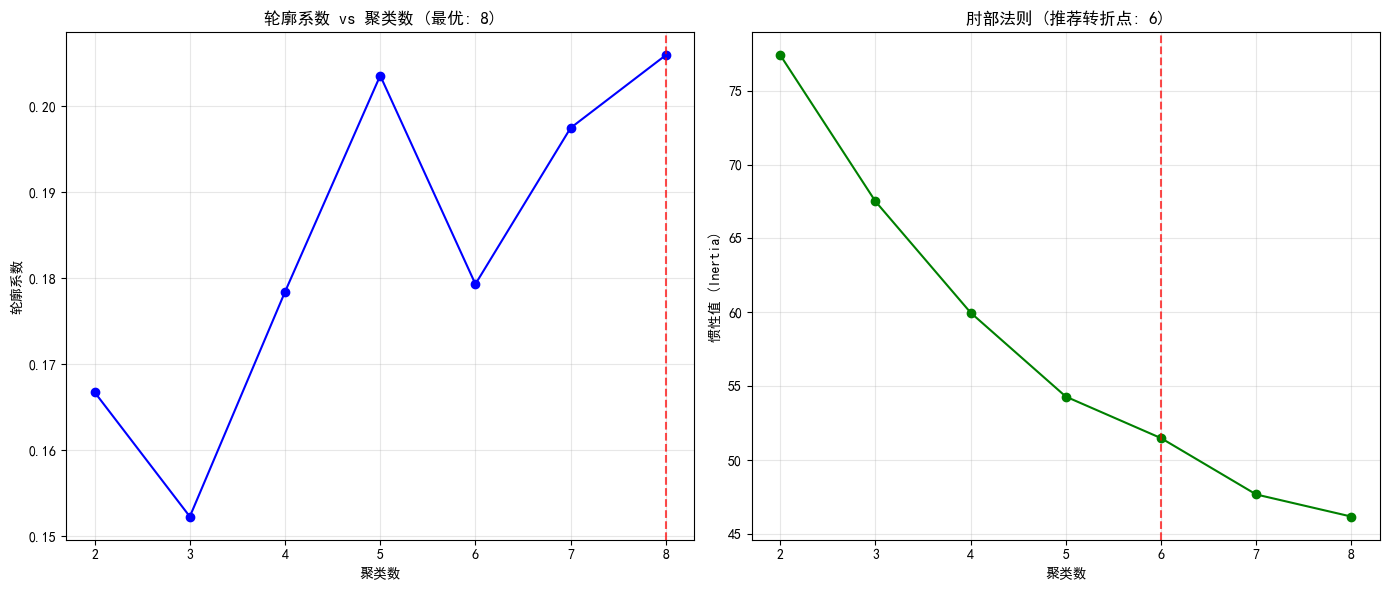

轮廓系数一般，使用肘部法则推荐聚类数: 6

使用最优聚类数: 6
聚类类别名称已更新: ['社会批判型', '身体探索型', '仪式过程型', '关系互动型', '环境主题型', '材料实验型']

=== 执行K-means聚类 (n_clusters=6) ===
聚类轮廓系数: 0.0920

=== 聚类特征分析 ===

【关系互动型】 (类别3)
  作品数量: 87 (36.4%)
  主要特征:
    - 时间_长时: 0.3691
    - 互动_参与: 0.3312
    - 互动_观众: 0.0425
    - 主题_身份: 0.0411
    - 社会_政治: 0.0342

【身体探索型】 (类别1)
  作品数量: 53 (22.2%)
  主要特征:
    - 互动_观众: 0.3851
    - 互动_参与: 0.1449
    - 美学_重复: 0.1422
    - 时间_长时: 0.0654
    - 身体_极限: 0.0523

【环境主题型】 (类别4)
  作品数量: 32 (13.4%)
  主要特征:
    - 场所_画廊: 0.4705
    - 时间_长时: 0.1739
    - 互动_参与: 0.0820
    - 主题_环境: 0.0410
    - 互动_观众: 0.0391

【社会批判型】 (类别0)
  作品数量: 28 (11.7%)
  主要特征:
    - 身体_动作: 0.2608
    - 主题_环境: 0.1690
    - 时间_长时: 0.1290
    - 互动_参与: 0.1126
    - 社会_经济: 0.0888

【材料实验型】 (类别5)
  作品数量: 23 (9.6%)
  主要特征:
    - 社会_权力: 0.2238
    - 社会_政治: 0.1874
    - 场所_公共: 0.1850
    - 时间_长时: 0.1159
    - 主题_性别: 0.0895

【仪式过程型】 (类别2)
  作品数量: 16 (6.7%)
  主要特征:
    - 材料_日常: 0.3646
    - 身体_裸露: 0.1370
    - 互动_参与: 0.1120
    - 互动_观众: 0.0943
   

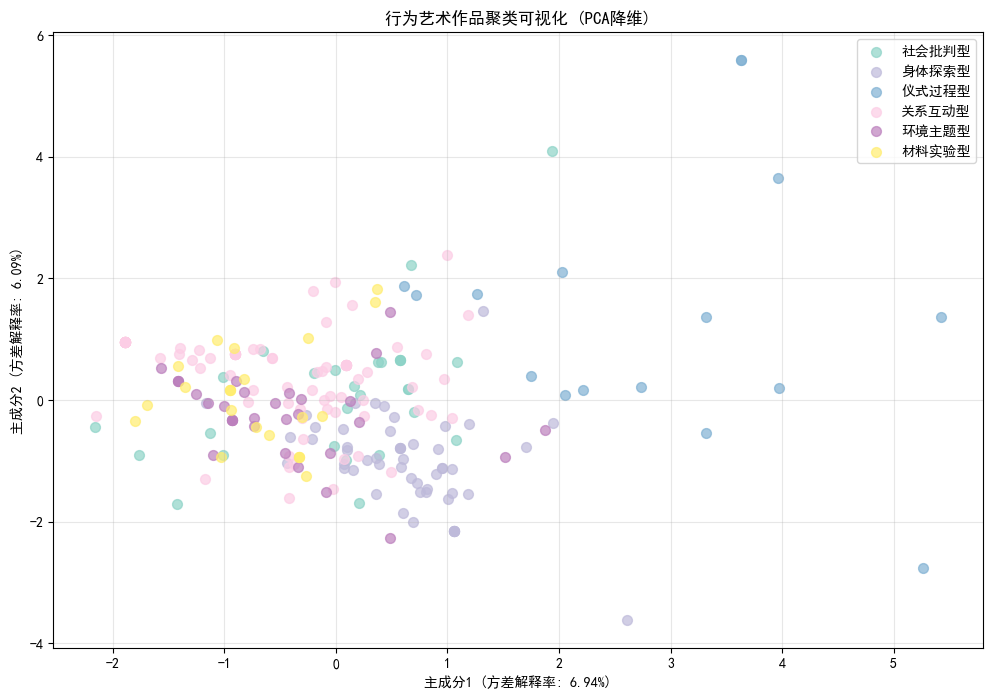

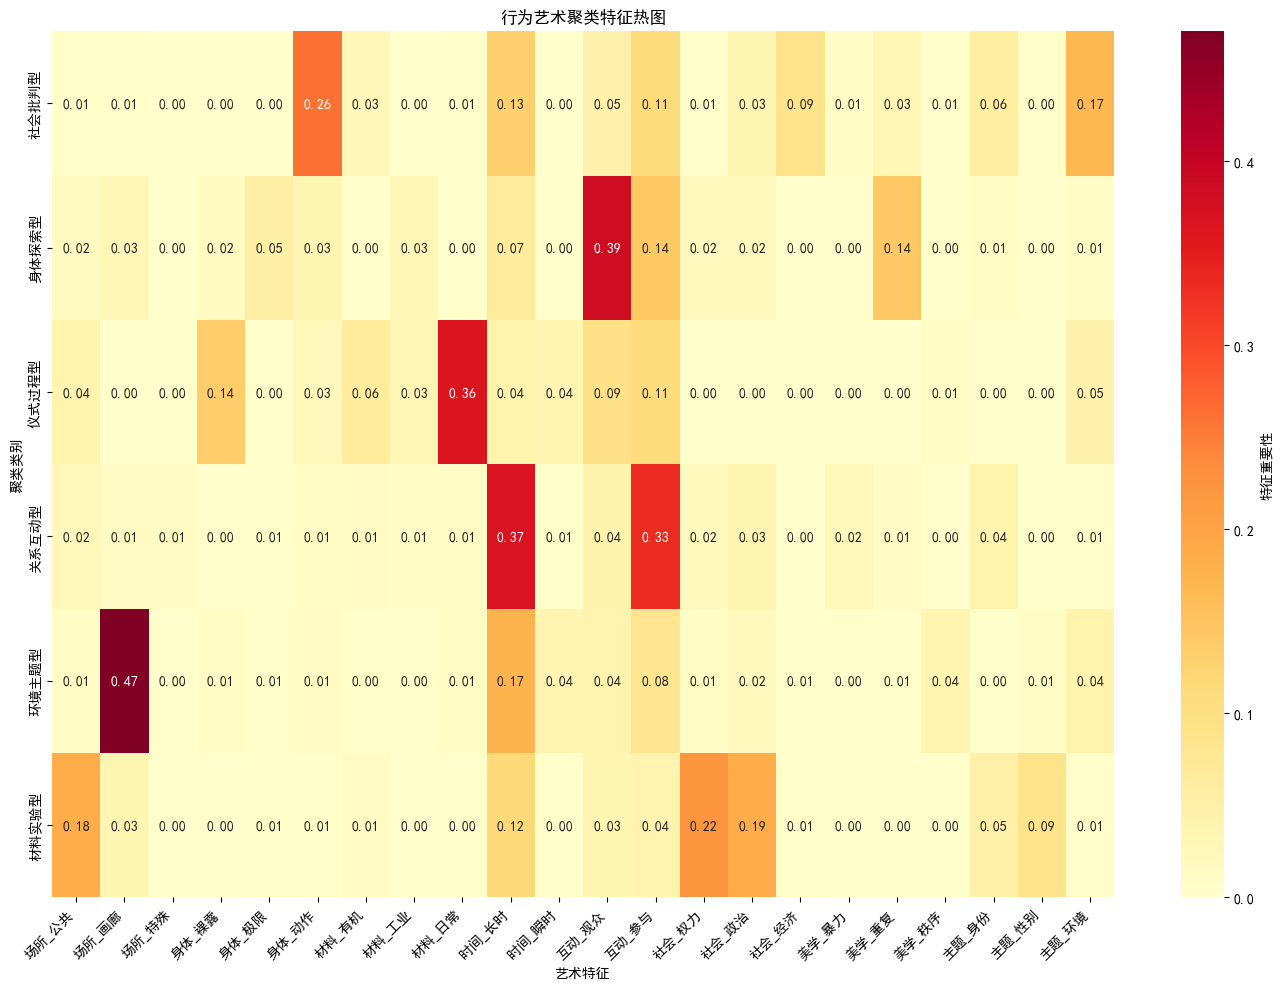


行为艺术聚类解读

✦ 关系互动型 ✦
----------------------------------------
核心特征: 时间_长时, 互动_参与, 互动_观众
作品数量: 87 (36.4%)
艺术解读: 这类作品强调观众参与和互动，通过共同创作探讨个体与集体的身份认同问题，具有社会建构性和关系美学特征。
代表性作品:
  • 10月14日，11:00,北村艺术区 一 北村独立工厂澳门的吴方洲来到新都，专门为 这个现场做了个录像作品。他花了一 天的时间在新都的墓地寻找与他同年 同日出生的墓碑，屏幕上只是他对着 墓地走动的背影...
  • 澳门行为艺术现场2009年10月，中国澳门 以前曾两次回国路过澳门，因为没 有朋友，也就没有停留过。这次能随陈 进一道参加澳门的行为艺术活动也算是 一个机会去了解澳门了。我从北京回到 新加坡，订了两天...
  • 告别宴中看到的牛头骨红的精神气场，人们的兴奋再次推向了 高 潮 。与在上海的张建君老友相见，原来 我们在纽约就认识。大家一起喝酒，建 君谈到1993年在华沙遇到日本的行为 艺术家霜田诚二，并一起参加了...


✦ 身体探索型 ✦
----------------------------------------
核心特征: 互动_观众, 互动_参与, 美学_重复
作品数量: 53 (22.2%)
艺术解读: 通过长时间的、重复性的身体极限体验，这类作品创造出一种仪式感，挑战身体的边界与忍耐力，具有强烈的精神性和哲学意味。
代表性作品:
  • 稍会儿，她开始蹬脚下的踏板，那堆在地下的东西充气后一点点大起来。她蹬得满头 大汗，终于那充气人抬起头了——原来是国王陛下。当俩人向观众致礼后，她丢开脚 下的踏板，放了气，她手扶着国王，他们如同鞠躬一样...
  • 作品太长，几次都以为该结束了，重复以往作品的因素，最后一个还撞上墙了，让人 想起日本的阿莱。马拉帝用了许多道具： 一个有金鱼的鱼缸、 一卷白纸、放很大的单音琴声，用胶 带在地上胶平行线， 一个红地毯，...
  • 为手稿)的意思， Beself和freedoom (成为你自己和自由)。他想写行为指南：1.不 要伤害自己，不要伤害观众。2.擦干你的垃圾。说了历届菲律宾行为艺术节：第一届 1999年Pipaf(角色...


✦ 环境主题型 ✦
----

In [7]:
import pandas as pd
import numpy as np
import re
import jieba
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体，确保可视化图像正常显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False

class BehaviorArtClusterAnalyzer:
    def __init__(self, n_clusters=4):
        """初始化聚类分析器"""
        self.n_clusters = n_clusters
        
        # 定义行为艺术特征词典
        self.behavior_tags = {
            '场所_公共': ['街头', '广场', '商场', '地铁', '车站', '公园', '公共空间', '城市'],
            '场所_画廊': ['画廊', '美术馆', '博物馆', '艺术中心', '展览', '展厅'],
            '场所_特殊': ['废墟', '工厂', '荒野', '山区', '水域', '乡村'],
            '身体_裸露': ['赤裸', '裸露', '裸体', '光着', '脱光', '不穿衣服'],
            '身体_极限': ['忍耐', '痛苦', '极限', '昏厥', '受伤', '流血', '疲惫'],
            '身体_动作': ['静坐', '站立', '行走', '奔跑', '跳跃', '爬行', '舞蹈'],
            '材料_有机': ['血液', '鲜血', '肉体', '动物', '植物', '食物', '毛发'],
            '材料_工业': ['水泥', '钢铁', '玻璃', '塑料', '陶瓷', '金属'],
            '材料_日常': ['衣服', '家具', '书籍', '纸张', '货币', '电子产品'],
            '时间_长时': ['小时', '天', '周', '月', '持续', '长期', '不间断'],
            '时间_瞬时': ['瞬间', '刹那', '立即', '突然', '爆发'],
            '互动_观众': ['观众', '路人', '围观', '观看', '见证', '目击'],
            '互动_参与': ['参与', '互动', '合作', '共同', '一起', '协助'],
            '社会_权力': ['警察', '保安', '政府', '官方', '干预', '禁止', '审查'],
            '社会_政治': ['政治', '权力', '自由', '民主', '抗议', '示威', '革命'],
            '社会_经济': ['消费', '商业', '资本', '金钱', '价格', '市场', '买卖'],
            '美学_暴力': ['暴力', '破坏', '摔碎', '切割', '撕裂', '毁坏'],
            '美学_重复': ['重复', '循环', '反复', '一次次', '不断'],
            '美学_秩序': ['整齐', '规律', '对称', '排列', '网格'],
            '主题_身份': ['身份', '自我', '个体', '个人', '认同'],
            '主题_性别': ['性别', '女性', '男性', '女权', '男权', '平等'],
            '主题_环境': ['环境', '自然', '生态', '污染', '保护', '地球']
        }
        
        # 反转词典，用于快速查找
        self.keyword_to_tag = {}
        for tag, keywords in self.behavior_tags.items():
            for keyword in keywords:
                self.keyword_to_tag[keyword] = tag
        
        # 聚类类别名称（根据分析结果动态更新）
        self.cluster_names = {
            0: "社会批判型",
            1: "身体探索型", 
            2: "仪式过程型",
            3: "关系互动型"
        }
    
    def load_text_data(self, file_path):
        """加载文本数据"""
        print(f"正在加载数据: {file_path}")
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # 清洗数据，去除空行和过短文本
        texts = [line.strip() for line in lines if len(line.strip()) > 10]
        print(f"成功加载 {len(texts)} 条有效记录")
        return texts
    
    def preprocess_text(self, text):
        """文本预处理"""
        # 去除特殊字符和数字，保留中文和基本标点
        text = re.sub(r'[^\u4e00-\u9fa5，。！？；：、\s]', '', text)
        # 分词
        words = jieba.lcut(text)
        return words
    
    def extract_features_from_text(self, text):
        """从文本中提取特征向量"""
        words = self.preprocess_text(text)
        
        # 初始化特征向量（每个标签一个维度）
        features = np.zeros(len(self.behavior_tags))
        
        # 将标签映射为索引
        tag_to_idx = {tag: i for i, tag in enumerate(self.behavior_tags.keys())}
        
        # 统计标签出现次数
        for word in words:
            if word in self.keyword_to_tag:
                tag = self.keyword_to_tag[word]
                features[tag_to_idx[tag]] += 1
        
        # 标准化为频率（防止长文本主导）
        total_tags = np.sum(features)
        if total_tags > 0:
            features = features / total_tags
        
        return features
    
    def create_feature_matrix(self, texts):
        """创建特征矩阵"""
        print("正在提取特征并创建特征矩阵...")
        
        features_list = []
        valid_indices = []
        
        for i, text in enumerate(tqdm(texts)):
            features = self.extract_features_from_text(text)
            
            # 只保留有足够特征的作品
            if np.sum(features) > 0:
                features_list.append(features)
                valid_indices.append(i)
        
        if len(features_list) == 0:
            print("警告：没有提取到有效的特征！")
            return None, None, None
        
        # 转换为特征矩阵
        X = np.array(features_list)
        
        print(f"特征矩阵形状: {X.shape} (作品数 × 特征维度)")
        return X, valid_indices, list(self.behavior_tags.keys())
    
    def determine_optimal_clusters(self, X, max_clusters=10):
        """使用轮廓系数和肘部法则确定最优聚类数"""
        print("\n=== 确定最优聚类数 ===")
        
        silhouette_scores = []
        inertia_values = []
        cluster_range = range(2, min(max_clusters, len(X)) + 1)
        
        for n in cluster_range:
            kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(X)
            
            if len(np.unique(cluster_labels)) > 1:
                score = silhouette_score(X, cluster_labels)
                silhouette_scores.append(score)
                inertia_values.append(kmeans.inertia_)
                print(f"聚类数 {n}: 轮廓系数 = {score:.4f}, 惯性值 = {kmeans.inertia_:.2f}")
            else:
                silhouette_scores.append(0)
                inertia_values.append(0)
                print(f"聚类数 {n}: 无法计算轮廓系数")
        
        # 找到最优轮廓系数的聚类数
        optimal_silhouette = list(cluster_range)[np.argmax(silhouette_scores)]
        
        # 计算肘部法则的转折点
        if len(inertia_values) > 2:
            # 计算二阶导数（曲率变化）
            second_derivative = np.diff(np.diff(inertia_values))
            if len(second_derivative) > 0:
                elbow_index = np.argmax(np.abs(second_derivative)) + 2  # +2是因为二阶导数比原始数据短2
                optimal_elbow = list(cluster_range)[elbow_index]
            else:
                optimal_elbow = optimal_silhouette
        else:
            optimal_elbow = optimal_silhouette
        
        # 可视化
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # 轮廓系数图
        axes[0].plot(list(cluster_range), silhouette_scores, 'bo-')
        axes[0].axvline(x=optimal_silhouette, color='r', linestyle='--', alpha=0.7)
        axes[0].set_xlabel('聚类数')
        axes[0].set_ylabel('轮廓系数')
        axes[0].set_title(f'轮廓系数 vs 聚类数 (最优: {optimal_silhouette})')
        axes[0].grid(True, alpha=0.3)
        
        # 肘部法则图
        axes[1].plot(list(cluster_range), inertia_values, 'go-')
        axes[1].axvline(x=optimal_elbow, color='r', linestyle='--', alpha=0.7)
        axes[1].set_xlabel('聚类数')
        axes[1].set_ylabel('惯性值 (Inertia)')
        axes[1].set_title(f'肘部法则 (推荐转折点: {optimal_elbow})')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # 综合考虑轮廓系数和肘部法则
        # 优先选择轮廓系数较高的，同时考虑肘部法则
        if optimal_silhouette == optimal_elbow:
            optimal_n = optimal_silhouette
            print(f"轮廓系数和肘部法则一致，推荐聚类数: {optimal_n}")
        else:
            # 如果两者不一致，优先选择轮廓系数较高的
            if silhouette_scores[optimal_silhouette-2] > 0.5:  # -2是因为cluster_range从2开始
                optimal_n = optimal_silhouette
                print(f"轮廓系数较高 ({silhouette_scores[optimal_silhouette-2]:.4f})，推荐聚类数: {optimal_n}")
            else:
                # 如果轮廓系数都不高，选择肘部法则的转折点
                optimal_n = optimal_elbow
                print(f"轮廓系数一般，使用肘部法则推荐聚类数: {optimal_n}")
        
        return optimal_n
    
    def update_cluster_names(self, n_clusters):
        """根据聚类数更新类别名称"""
        # 预先定义的类别名称，可以根据需要扩展
        predefined_names = {
            1: ["综合型"],
            2: ["社会批判型", "身体探索型"],
            3: ["社会批判型", "身体探索型", "关系互动型"],
            4: ["社会批判型", "身体探索型", "仪式过程型", "关系互动型"],
            5: ["社会批判型", "身体探索型", "仪式过程型", "关系互动型", "环境主题型"],
            6: ["社会批判型", "身体探索型", "仪式过程型", "关系互动型", "环境主题型", "材料实验型"],
            7: ["社会批判型", "身体探索型", "仪式过程型", "关系互动型", "环境主题型", "材料实验型", "时间探索型"],
            8: ["社会批判型", "身体探索型", "仪式过程型", "关系互动型", "环境主题型", "材料实验型", "时间探索型", "空间介入型"]
        }
        
        # 如果预定义的类别名称不够，使用通用名称
        if n_clusters in predefined_names:
            self.cluster_names = {i: predefined_names[n_clusters][i] for i in range(n_clusters)}
        else:
            self.cluster_names = {i: f"类别{i}" for i in range(n_clusters)}
        
        print(f"聚类类别名称已更新: {list(self.cluster_names.values())}")
    
    def perform_clustering(self, X, feature_names):
        """执行K-means聚类"""
        print(f"\n=== 执行K-means聚类 (n_clusters={self.n_clusters}) ===")
        
        # 标准化特征
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # 执行聚类
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        # 计算轮廓系数
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            print(f"聚类轮廓系数: {silhouette_avg:.4f}")
        
        # 获取聚类中心（原始特征空间）
        cluster_centers = kmeans.cluster_centers_
        
        return cluster_labels, cluster_centers, kmeans
    
    def analyze_cluster_characteristics(self, X, cluster_labels, feature_names):
        """分析每个聚类的特征"""
        print("\n=== 聚类特征分析 ===")
        
        # 创建聚类结果DataFrame
        results = []
        
        for cluster_id in range(self.n_clusters):
            # 获取属于该聚类的样本
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            
            if len(cluster_indices) == 0:
                continue
            
            # 计算该聚类中每个特征的平均值
            cluster_features = X[cluster_indices]
            feature_means = np.mean(cluster_features, axis=0)
            
            # 找到最重要的特征（top 5）
            top_feature_indices = np.argsort(feature_means)[-5:][::-1]
            top_features = [(feature_names[i], feature_means[i]) for i in top_feature_indices]
            
            # 统计信息
            cluster_info = {
                'cluster_id': cluster_id,
                'cluster_name': self.cluster_names.get(cluster_id, f"类别{cluster_id}"),
                'sample_count': len(cluster_indices),
                'percentage': len(cluster_indices) / len(X) * 100,
                'top_features': top_features
            }
            
            results.append(cluster_info)
        
        # 按样本数量排序
        results.sort(key=lambda x: x['sample_count'], reverse=True)
        
        # 打印聚类特征
        for cluster in results:
            print(f"\n【{cluster['cluster_name']}】 (类别{cluster['cluster_id']})")
            print(f"  作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            print("  主要特征:")
            for feature, score in cluster['top_features']:
                print(f"    - {feature}: {score:.4f}")
        
        return results
    
    def visualize_clusters(self, X, cluster_labels, feature_names):
        """可视化聚类结果"""
        print("\n=== 聚类结果可视化 ===")
        
        # 使用PCA降维到2D进行可视化
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
        
        # 创建可视化DataFrame
        df_viz = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'Cluster': cluster_labels
        })
        
        # 添加聚类名称
        df_viz['Cluster_Name'] = df_viz['Cluster'].apply(
            lambda x: self.cluster_names.get(x, f"类别{x}")
        )
        
        # 绘制散点图
        plt.figure(figsize=(12, 8))
        
        # 为每个聚类使用不同的颜色
        unique_clusters = sorted(df_viz['Cluster'].unique())
        colors = plt.cm.Set3(np.linspace(0, 1, len(unique_clusters)))
        
        for i, cluster_id in enumerate(unique_clusters):
            cluster_data = df_viz[df_viz['Cluster'] == cluster_id]
            cluster_name = self.cluster_names.get(cluster_id, f"类别{cluster_id}")
            
            plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                       c=[colors[i]], label=cluster_name, alpha=0.7, s=50)
        
        plt.xlabel(f'主成分1 (方差解释率: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'主成分2 (方差解释率: {pca.explained_variance_ratio_[1]:.2%})')
        plt.title('行为艺术作品聚类可视化 (PCA降维)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 绘制特征热图（每个聚类的平均特征）
        plt.figure(figsize=(14, 10))
        
        # 计算每个聚类的特征平均值
        cluster_means = []
        for cluster_id in range(self.n_clusters):
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            if len(cluster_indices) > 0:
                cluster_mean = np.mean(X[cluster_indices], axis=0)
                cluster_means.append(cluster_mean)
        
        # 创建热图DataFrame
        heatmap_data = pd.DataFrame(
            cluster_means,
            index=[self.cluster_names.get(i, f"类别{i}") for i in range(self.n_clusters)],
            columns=feature_names
        )
        
        # 绘制热图
        sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.2f', 
                   cbar_kws={'label': '特征重要性'})
        plt.title('行为艺术聚类特征热图')
        plt.xlabel('艺术特征')
        plt.ylabel('聚类类别')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return df_viz
    
    def interpret_clusters(self, cluster_results, texts, valid_indices, cluster_labels):
        """解读聚类结果并提供艺术分析"""
        print("\n" + "="*60)
        print("行为艺术聚类解读")
        print("="*60)
        
        for cluster in cluster_results:
            cluster_id = cluster['cluster_id']
            cluster_name = cluster['cluster_name']
            
            print(f"\n✦ {cluster_name} ✦")
            print("-" * 40)
            print(f"核心特征: {', '.join([f[0] for f in cluster['top_features'][:3]])}")
            print(f"作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            
            # 艺术解读
            interpretation = self.cluster_interpretation(cluster_id, cluster['top_features'])
            print(f"艺术解读: {interpretation}")
            
            # 展示代表性作品（如果有原始文本）
            if texts and valid_indices:
                # 找到属于该聚类的作品索引
                cluster_mask = cluster_labels == cluster_id
                cluster_original_indices = [valid_indices[i] for i in range(len(cluster_labels)) 
                                          if cluster_mask[i]]
                
                if cluster_original_indices:
                    # 随机选择3个代表性作品展示
                    sample_indices = np.random.choice(cluster_original_indices, 
                                                     min(3, len(cluster_original_indices)), 
                                                     replace=False)
                    
                    print("代表性作品:")
                    for idx in sample_indices:
                        text_preview = texts[idx][:100] + "..." if len(texts[idx]) > 100 else texts[idx]
                        print(f"  • {text_preview}")
            
            print()
    
    def cluster_interpretation(self, cluster_id, top_features):
        """根据聚类特征提供艺术解读"""
        feature_names = [f[0] for f in top_features]
        
        # 基于特征组合提供解读
        if '社会_权力' in feature_names or '社会_政治' in feature_names:
            if '场所_公共' in feature_names:
                return "这类行为艺术在公共空间进行社会政治批判，直接介入公共议题，具有较强的社会干预性。艺术家通过身体作为媒介，在权力机构的注视下挑战社会规范。"
            elif '身体_裸露' in feature_names:
                return "通过身体的暴露与政治议题的结合，这类作品探讨身体政治与权力结构的关系，强调个体在政治语境中的脆弱性与抵抗。"
        
        if '身体_极限' in feature_names and '时间_长时' in feature_names:
            if '美学_重复' in feature_names:
                return "通过长时间的、重复性的身体极限体验，这类作品创造出一种仪式感，挑战身体的边界与忍耐力，具有强烈的精神性和哲学意味。"
            elif '材料_有机' in feature_names:
                return "将身体极限与有机材料结合，强调生命的脆弱性、物质的转化过程，以及身体与自然物质的互动关系。"
        
        if '互动_参与' in feature_names or '互动_观众' in feature_names:
            if '主题_身份' in feature_names:
                return "这类作品强调观众参与和互动，通过共同创作探讨个体与集体的身份认同问题，具有社会建构性和关系美学特征。"
            elif '场所_画廊' in feature_names:
                return "在制度化的艺术空间内邀请观众参与，这类作品挑战传统的观看关系，将艺术创作过程开放给公众，具有参与式民主的意味。"
        
        if '美学_秩序' in feature_names or '美学_重复' in feature_names:
            if '时间_长时' in feature_names:
                return "通过有序的、重复的行为模式与长时间的持续，这类作品创造出一种近乎宗教仪式的体验，强调过程的意义而非结果。"
        
        if '主题_环境' in feature_names and '场所_特殊' in feature_names:
            return "在特定自然环境中进行的生态主题行为艺术，强调人类与自然的关系，具有生态批评和环保主义色彩。"
        
        # 默认解读
        feature_categories = {
            '社会': [f for f in feature_names if f.startswith('社会_')],
            '身体': [f for f in feature_names if f.startswith('身体_')],
            '互动': [f for f in feature_names if f.startswith('互动_')],
            '主题': [f for f in feature_names if f.startswith('主题_')],
        }
        
        main_categories = [k for k, v in feature_categories.items() if v]
        if main_categories:
            categories_str = '、'.join(main_categories)
            return f"这类行为艺术主要关注{categories_str}层面的表达，通过特定策略创造独特的艺术体验和社会意义。"
        else:
            return "这类行为艺术具有独特的创作特征，通过特定的行为策略表达艺术家的观念与思考。"
    
    def run_complete_analysis(self, file_path, use_optimal_clusters=True):
        """运行完整的聚类分析流程"""
        print("="*60)
        print("行为艺术聚类分析")
        print("="*60)
        
        # 1. 加载数据
        texts = self.load_text_data(file_path)
        
        # 2. 创建特征矩阵
        X, valid_indices, feature_names = self.create_feature_matrix(texts)
        
        if X is None:
            print("无法创建特征矩阵，分析终止。")
            return None
        
        # 3. 确定最优聚类数
        if use_optimal_clusters:
            optimal_n = self.determine_optimal_clusters(X, max_clusters=8)
            self.n_clusters = optimal_n  # 使用最优聚类数
            print(f"\n使用最优聚类数: {self.n_clusters}")
            
            # 更新聚类类别名称（根据聚类数调整）
            self.update_cluster_names(self.n_clusters)
        else:
            print(f"\n使用预设聚类数: {self.n_clusters}")
        
        # 4. 执行聚类
        cluster_labels, cluster_centers, kmeans = self.perform_clustering(X, feature_names)
        
        # 5. 分析聚类特征
        cluster_results = self.analyze_cluster_characteristics(X, cluster_labels, feature_names)
        
        # 6. 可视化
        df_viz = self.visualize_clusters(X, cluster_labels, feature_names)
        
        # 7. 解读聚类结果
        self.interpret_clusters(cluster_results, texts, valid_indices, cluster_labels)
        
        print("\n" + "="*60)
        print("聚类分析完成！")
        print("="*60)
        
        return {
            'texts': texts,
            'X': X,
            'cluster_labels': cluster_labels,
            'cluster_centers': cluster_centers,
            'feature_names': feature_names,
            'cluster_results': cluster_results,
            'kmeans_model': kmeans,
            'n_clusters': self.n_clusters
        }


# 主函数
def main():
    # 初始化聚类分析器（初始聚类数不重要，会被最优推荐覆盖）
    analyzer = BehaviorArtClusterAnalyzer(n_clusters=4)  # 初始值不重要
    
    # 运行完整分析，使用最优聚类数
    file_path = "behavior_art_texts.txt"  # 替换为您的文件路径
    results = analyzer.run_complete_analysis(file_path, use_optimal_clusters=True)
    
    # 如果分析成功，可以进行进一步的分析
    if results is not None:
        print(f"\n分析总结:")
        print(f"- 分析作品总数: {len(results['texts'])}")
        print(f"- 有效作品数: {results['X'].shape[0]}")
        print(f"- 特征维度: {results['X'].shape[1]}")
        print(f"- 最终聚类数: {results['n_clusters']}")
        
        # 查看聚类分布
        print("\n聚类分布:")
        cluster_counts = pd.Series(results['cluster_labels']).value_counts().sort_index()
        for cluster_id, count in cluster_counts.items():
            cluster_name = analyzer.cluster_names.get(cluster_id, f"类别{cluster_id}")
            percentage = count / len(results['cluster_labels']) * 100
            print(f"  {cluster_name}: {count}件 ({percentage:.1f}%)")


if __name__ == "__main__":
    # 安装所需库（如果尚未安装）
    # pip install pandas numpy jieba scikit-learn matplotlib seaborn tqdm
    
    main()

行为艺术聚类分析 (TF-IDF + t-SNE)
正在加载数据: behavior_art_texts.txt
成功加载 271 条有效记录
正在提取特征并创建TF-IDF特征矩阵...


100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 419.10it/s]


计数特征矩阵形状: (239, 22) (作品数 × 特征维度)
正在应用TF-IDF加权...
TF-IDF转换完成，查看特征权重变化:
  计数矩阵: 最小值=0.0, 最大值=9.0, 平均值=0.1987
  TF-IDF矩阵: 最小值=0.0000, 最大值=1.0000, 平均值=0.0721
TF-IDF权重最高的特征:
  - 时间_长时: 0.2384
  - 互动_参与: 0.2318
  - 互动_观众: 0.1725
  - 场所_画廊: 0.1280
  - 身体_动作: 0.0788

有效作品数: 239
特征维度: 22

=== 使用肘部法则确定聚类数 ===
聚类数 1: 惯性值 = 190.68
聚类数 2: 惯性值 = 170.49
聚类数 3: 惯性值 = 155.27
聚类数 4: 惯性值 = 142.30
聚类数 5: 惯性值 = 129.77
聚类数 6: 惯性值 = 121.28
聚类数 7: 惯性值 = 113.84
聚类数 8: 惯性值 = 106.57
聚类数 9: 惯性值 = 99.59
聚类数 10: 惯性值 = 95.05


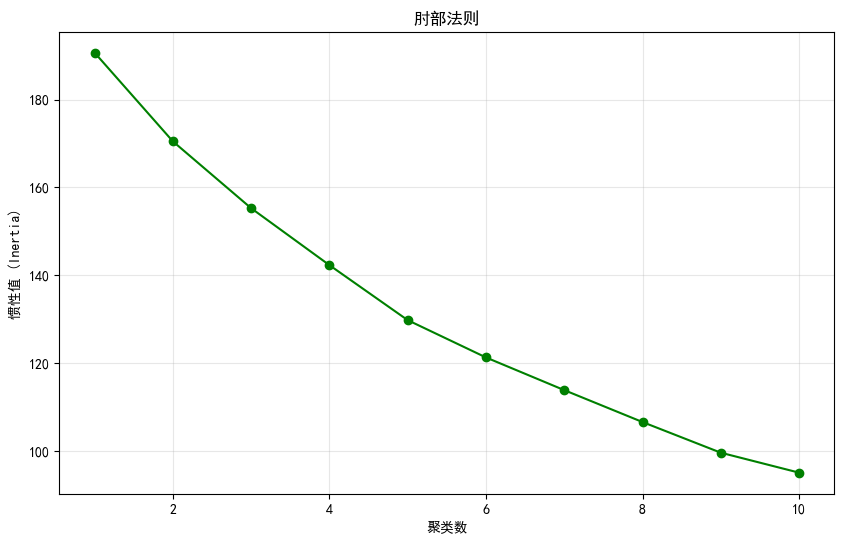

肘部法则推荐聚类数: 3
肘部法则推荐聚类数: 3
注意：肘部法则推荐聚类数为3，但根据研究需求强制使用6类

正在执行KMeans聚类 (n_clusters=6)...
聚类轮廓系数: 0.1860

=== 聚类特征分析 ===

【动作·身份型】 (聚类0)
  作品数量: 68 (28.5%)
  主要特征 (TF-IDF权重):
    - 身体_动作: 0.1553
    - 主题_身份: 0.1550
    - 场所_公共: 0.1519
    - 社会_政治: 0.1290
    - 社会_权力: 0.1195

【参与·长时型】 (聚类3)
  作品数量: 43 (18.0%)
  主要特征 (TF-IDF权重):
    - 互动_参与: 0.6606
    - 时间_长时: 0.1593
    - 主题_环境: 0.1327
    - 材料_日常: 0.0896
    - 互动_观众: 0.0818

【观众·参与型】 (聚类4)
  作品数量: 37 (15.5%)
  主要特征 (TF-IDF权重):
    - 互动_观众: 0.7467
    - 互动_参与: 0.1731
    - 时间_长时: 0.1111
    - 身体_动作: 0.0575
    - 场所_公共: 0.0558

【画廊·长时型】 (聚类1)
  作品数量: 34 (14.2%)
  主要特征 (TF-IDF权重):
    - 场所_画廊: 0.7310
    - 时间_长时: 0.2074
    - 互动_参与: 0.1054
    - 社会_权力: 0.0818
    - 主题_环境: 0.0801

【长时·参与型】 (聚类2)
  作品数量: 34 (14.2%)
  主要特征 (TF-IDF权重):
    - 时间_长时: 0.8681
    - 互动_参与: 0.2451
    - 场所_画廊: 0.0452
    - 社会_权力: 0.0406
    - 场所_特殊: 0.0236

【重复·参与型】 (聚类5)
  作品数量: 23 (9.6%)
  主要特征 (TF-IDF权重):
    - 美学_重复: 0.6491
    - 互动_参与: 0.1702
    - 主题_环境: 0.1312

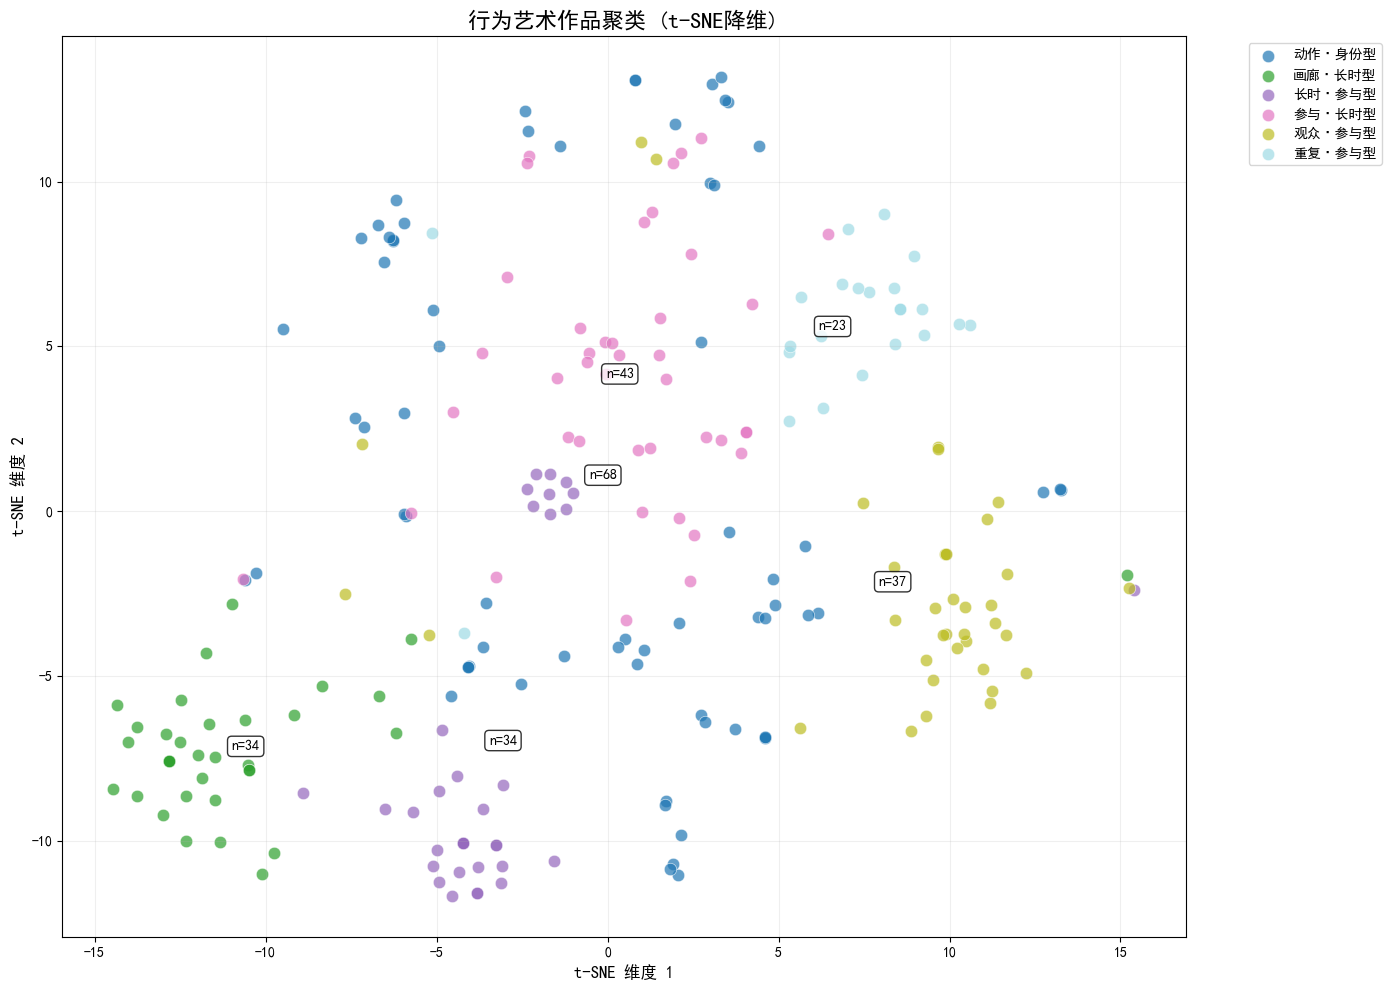


正在创建聚类特征热图...


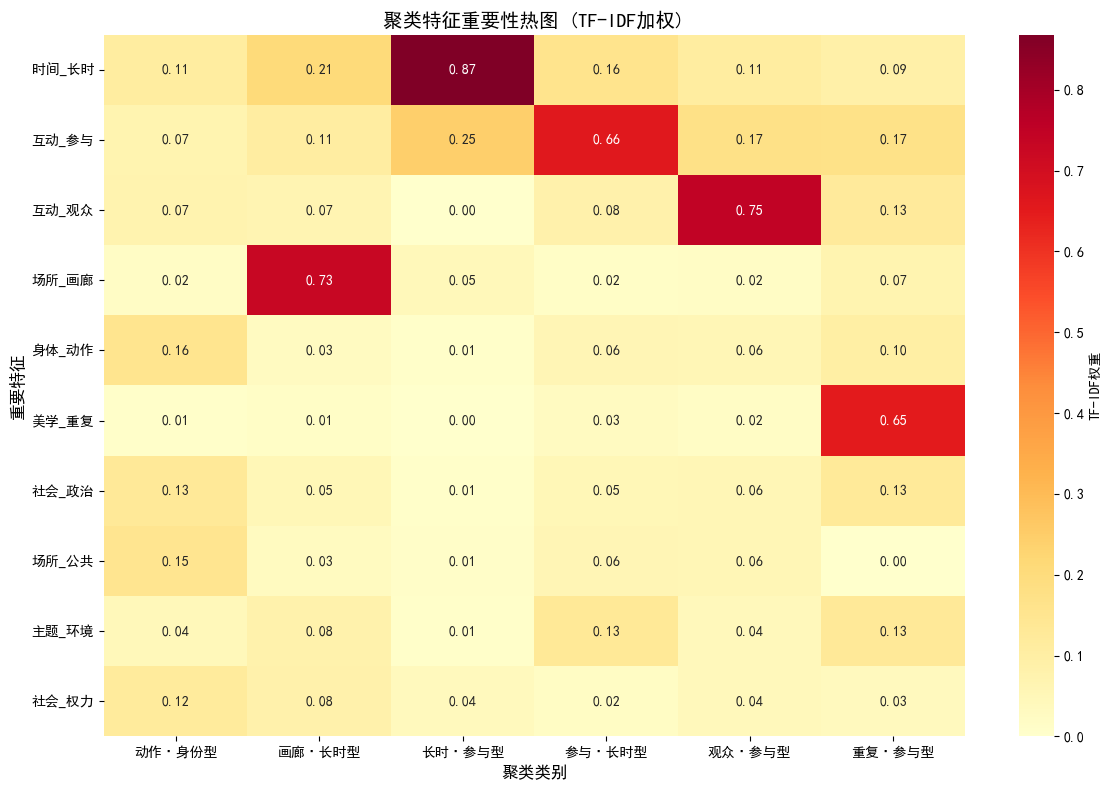


行为艺术聚类解读

✦ 动作·身份型 ✦
----------------------------------------
核心特征: 身体_动作, 主题_身份
作品数量: 68 (28.5%)
艺术解读: 在公共空间中进行社会批判，这类作品直接介入公共议题，具有较强的社会干预性和政治表达。
代表性作品:
  • “Performance,are you Japanese? ”(你是日本行为艺术家吧?)他才知是自己的队伍， 似乎成都 “UP-ON”   的行为艺术在机场就...
  • 揉搓的报纸中拿出照相机说拍个照，作品就在他叩快门的一声中结束，果真一网打尽。本届“UP-ON” 现场行为艺术分两个区，13至14日转到成都的卫星城新都。在  这...


✦ 参与·长时型 ✦
----------------------------------------
核心特征: 互动_参与, 时间_长时
作品数量: 43 (18.0%)
艺术解读: 这类行为艺术主要关注互动、时间层面的表达，通过特定的艺术策略创造独特的体验。
代表性作品:
  • 马拉帝：《彩虹》 拥抱，一起摇晃寻找平衡。他拿出一把 大锤子，用其在瓶上敲出声响，用锤子 推瓶子，瓶子激烈地晃动，发出美妙的 声音。他猛然挥动锤子，打碎了瓶子，...
  • 铃，如同马铃伴着时光时远时近，时而停下念出纪念的人名， 很长的名单。新加坡的林凯烈做了一个小品，他将在本周表演过的 行为，用过的道具，给予情节再现。当人们刚看出...


✦ 观众·参与型 ✦
----------------------------------------
核心特征: 互动_观众, 互动_参与
作品数量: 37 (15.5%)
艺术解读: 这类作品以身体为媒介，强调与观众的互动关系，探索身体与社会、个体与集体的边界。
代表性作品:
  • 来成为实验艺术的大本营而增加信心。当晚由浓园老板蒋林与陈娇夫妻 招待我们，他们不仅为本届“UP-ON” 提供场地与赞助，而且还包下每日丰盛 的晚餐，真是难得有这...
  • (Hiromi   Shirai) 很安静地完成她的作品，她咀嚼口香糖，并与观众同享， 一起体验 静默的咀嚼。年轻艺术家刘纬在“UP-ON ” (向上)国际现场...


✦ 画廊·长时型 ✦
-------------------

In [5]:
import pandas as pd
import numpy as np
import re
import jieba
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class BehaviorArtClusterAnalyzer:
    def __init__(self, n_clusters=None):
        """初始化聚类分析器"""
        self.n_clusters = n_clusters
        
        # 定义行为艺术特征词典
        self.behavior_tags = {
            '场所_公共': ['街头', '广场', '商场', '地铁', '车站', '公园', '公共空间', '城市'],
            '场所_画廊': ['画廊', '美术馆', '博物馆', '艺术中心', '展览', '展厅'],
            '场所_特殊': ['废墟', '工厂', '荒野', '山区', '水域', '乡村'],
            '身体_裸露': ['赤裸', '裸露', '裸体', '光着', '脱光', '不穿衣服'],
            '身体_极限': ['忍耐', '痛苦', '极限', '昏厥', '受伤', '流血', '疲惫'],
            '身体_动作': ['静坐', '站立', '行走', '奔跑', '跳跃', '爬行', '舞蹈'],
            '材料_有机': ['血液', '鲜血', '肉体', '动物', '植物', '食物', '毛发'],
            '材料_工业': ['水泥', '钢铁', '玻璃', '塑料', '陶瓷', '金属'],
            '材料_日常': ['衣服', '家具', '书籍', '纸张', '货币', '电子产品'],
            '时间_长时': ['小时', '天', '周', '月', '持续', '长期', '不间断'],
            '时间_瞬时': ['瞬间', '刹那', '立即', '突然', '爆发'],
            '互动_观众': ['观众', '路人', '围观', '观看', '见证', '目击'],
            '互动_参与': ['参与', '互动', '合作', '共同', '一起', '协助'],
            '社会_权力': ['警察', '保安', '政府', '官方', '干预', '禁止', '审查'],
            '社会_政治': ['政治', '权力', '自由', '民主', '抗议', '示威', '革命'],
            '社会_经济': ['消费', '商业', '资本', '金钱', '价格', '市场', '买卖'],
            '美学_暴力': ['暴力', '破坏', '摔碎', '切割', '撕裂', '毁坏'],
            '美学_重复': ['重复', '循环', '反复', '一次次', '不断'],
            '美学_秩序': ['整齐', '规律', '对称', '排列', '网格'],
            '主题_身份': ['身份', '自我', '个体', '个人', '认同'],
            '主题_性别': ['性别', '女性', '男性', '女权', '男权', '平等'],
            '主题_环境': ['环境', '自然', '生态', '污染', '保护', '地球']
        }
        
        # 反转词典，用于快速查找
        self.keyword_to_tag = {}
        for tag, keywords in self.behavior_tags.items():
            for keyword in keywords:
                self.keyword_to_tag[keyword] = tag
        
        # 聚类类别名称（根据分析结果动态更新）
        self.cluster_names = {}
    
    def load_text_data(self, file_path):
        """加载文本数据"""
        print(f"正在加载数据: {file_path}")
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # 清洗数据，去除空行和过短文本
        texts = [line.strip() for line in lines if len(line.strip()) > 10]
        print(f"成功加载 {len(texts)} 条有效记录")
        return texts
    
    def preprocess_text(self, text):
        """文本预处理"""
        # 去除特殊字符和数字，保留中文和基本标点
        text = re.sub(r'[^\u4e00-\u9fa5，。！？；：、\s]', '', text)
        # 分词
        words = jieba.lcut(text)
        return words
    
    def create_tfidf_feature_matrix(self, texts):
        """创建TF-IDF加权特征矩阵"""
        print("正在提取特征并创建TF-IDF特征矩阵...")
        
        features_list = []
        valid_indices = []
        tag_names = list(self.behavior_tags.keys())
        tag_to_idx = {tag: i for i, tag in enumerate(tag_names)}
        
        # 第一阶段：创建计数特征矩阵
        for i, text in enumerate(tqdm(texts)):
            words = self.preprocess_text(text)
            
            # 初始化特征向量（每个标签一个维度）
            features = np.zeros(len(tag_names))
            
            # 统计标签出现次数
            tag_counts = {}
            for word in words:
                if word in self.keyword_to_tag:
                    tag = self.keyword_to_tag[word]
                    if tag in tag_counts:
                        tag_counts[tag] += 1
                    else:
                        tag_counts[tag] = 1
            
            # 填充特征向量
            for tag, count in tag_counts.items():
                features[tag_to_idx[tag]] = count
            
            # 只保留有足够特征的作品
            if np.sum(features) > 0:
                features_list.append(features)
                valid_indices.append(i)
        
        if len(features_list) == 0:
            print("警告：没有提取到有效的特征！")
            return None, None, None
        
        # 转换为计数矩阵
        X_count = np.array(features_list)
        print(f"计数特征矩阵形状: {X_count.shape} (作品数 × 特征维度)")
        
        # 第二阶段：应用TF-IDF加权
        print("正在应用TF-IDF加权...")
        tfidf_transformer = TfidfTransformer()
        X_tfidf = tfidf_transformer.fit_transform(X_count).toarray()
        
        # 显示TF-IDF效果
        print("TF-IDF转换完成，查看特征权重变化:")
        print(f"  计数矩阵: 最小值={X_count.min()}, 最大值={X_count.max()}, 平均值={X_count.mean():.4f}")
        print(f"  TF-IDF矩阵: 最小值={X_tfidf.min():.4f}, 最大值={X_tfidf.max():.4f}, 平均值={X_tfidf.mean():.4f}")
        
        # 找出TF-IDF权重最高的特征
        feature_importance = np.mean(X_tfidf, axis=0)
        top_indices = np.argsort(feature_importance)[-5:][::-1]
        top_features = [(tag_names[i], feature_importance[i]) for i in top_indices]
        
        print("TF-IDF权重最高的特征:")
        for feature, weight in top_features:
            print(f"  - {feature}: {weight:.4f}")
        
        return X_tfidf, valid_indices, tag_names
    
    def _determine_by_elbow(self, X, max_clusters=10):
        """使用肘部法则确定聚类数"""
        print("\n=== 使用肘部法则确定聚类数 ===")
        
        inertia_values = []
        cluster_range = range(1, min(max_clusters, len(X)) + 1)
        
        for n in cluster_range:
            kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
            kmeans.fit(X)
            inertia_values.append(kmeans.inertia_)
            print(f"聚类数 {n}: 惯性值 = {kmeans.inertia_:.2f}")
        
        # 可视化
        plt.figure(figsize=(10, 6))
        plt.plot(list(cluster_range), inertia_values, 'go-')
        plt.xlabel('聚类数')
        plt.ylabel('惯性值 (Inertia)')
        plt.title('肘部法则')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 找到肘部点（曲率变化最大的点）
        if len(inertia_values) > 2:
            # 计算二阶导数（曲率）
            second_derivative = np.diff(np.diff(inertia_values))
            if len(second_derivative) > 0:
                elbow_index = np.argmax(np.abs(second_derivative)) + 2
                optimal_n = list(cluster_range)[elbow_index]
            else:
                optimal_n = 2
        else:
            optimal_n = 2
        
        print(f"肘部法则推荐聚类数: {optimal_n}")
        return optimal_n
    
    def perform_tsne_visualization(self, X, cluster_labels, perplexity=30):
        """使用t-SNE进行降维可视化"""
        print("\n=== 执行t-SNE降维可视化 ===")
        
        # t-SNE参数设置
        n_samples = X.shape[0]
        actual_perplexity = min(perplexity, n_samples - 1)
        
        print(f"t-SNE参数: 困惑度={actual_perplexity}, 样本数={n_samples}")
        
        # 执行t-SNE
        tsne = TSNE(n_components=2, 
                   random_state=42,
                   perplexity=actual_perplexity,
                   learning_rate=200,
                   n_iter=1000,
                   init='pca')
        
        X_tsne = tsne.fit_transform(X)
        print(f"t-SNE降维完成，形状: {X_tsne.shape}")
        
        return X_tsne
    
    def visualize_clusters_tsne(self, X, X_tsne, cluster_labels, cluster_names):
        """可视化t-SNE降维后的聚类结果"""
        print("\n=== 可视化t-SNE聚类结果 ===")
        
        # 创建DataFrame用于绘图
        df_tsne = pd.DataFrame({
            't-SNE_1': X_tsne[:, 0],
            't-SNE_2': X_tsne[:, 1],
            'Cluster': cluster_labels
        })
        
        # 添加聚类名称
        df_tsne['Cluster_Name'] = df_tsne['Cluster'].apply(
            lambda x: cluster_names.get(x, f"类别{x}")
        )
        
        # 1. 基本散点图
        plt.figure(figsize=(14, 10))
        
        unique_clusters = np.unique(cluster_labels)
        colors = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters)))
        
        for i, cluster_id in enumerate(unique_clusters):
            cluster_data = df_tsne[df_tsne['Cluster'] == cluster_id]
            cluster_name = cluster_names.get(cluster_id, f"类别{cluster_id}")
            
            plt.scatter(cluster_data['t-SNE_1'], cluster_data['t-SNE_2'], 
                       c=[colors[i]], label=cluster_name, alpha=0.7, s=80,
                       edgecolors='white', linewidth=0.5)
        
        plt.xlabel('t-SNE 维度 1', fontsize=12)
        plt.ylabel('t-SNE 维度 2', fontsize=12)
        plt.title('行为艺术作品聚类 (t-SNE降维)', fontsize=16, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.grid(True, alpha=0.2)
        
        # 添加聚类大小信息
        cluster_sizes = df_tsne['Cluster'].value_counts().sort_index()
        for i, (cluster_id, size) in enumerate(cluster_sizes.items()):
            cluster_center = df_tsne[df_tsne['Cluster'] == cluster_id][['t-SNE_1', 't-SNE_2']].mean()
            plt.text(cluster_center[0], cluster_center[1], 
                    f'n={size}', fontsize=10, fontweight='bold',
                    ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # 2. 特征重要性热图
        print("\n正在创建聚类特征热图...")
        
        # 计算特征重要性（全局）
        feature_importance = np.mean(X, axis=0)
        n_features = min(10, X.shape[1])  # 显示最重要的特征，最多10个
        top_feature_indices = np.argsort(feature_importance)[-n_features:][::-1]
        
        # 计算每个聚类的特征平均值
        cluster_means = []
        for cluster_id in unique_clusters:
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            if len(cluster_indices) > 0:
                cluster_mean = np.mean(X[cluster_indices][:, top_feature_indices], axis=0)
                cluster_means.append(cluster_mean)
        
        # 创建热图
        plt.figure(figsize=(12, 8))
        
        heatmap_data = np.array(cluster_means).T  # 转置以便特征为行，聚类为列
        
        # 获取特征名称
        feature_names = list(self.behavior_tags.keys())
        top_feature_names = [feature_names[i] for i in top_feature_indices]
        
        sns.heatmap(heatmap_data, 
                   xticklabels=[cluster_names.get(i, f"类别{i}") for i in unique_clusters],
                   yticklabels=[name[:15] + "..." if len(name) > 15 else name for name in top_feature_names],
                   cmap='YlOrRd',
                   annot=True,
                   fmt='.2f',
                   cbar_kws={'label': 'TF-IDF权重'})
        
        plt.title('聚类特征重要性热图 (TF-IDF加权)', fontsize=14, fontweight='bold')
        plt.xlabel('聚类类别', fontsize=12)
        plt.ylabel('重要特征', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        return df_tsne
    
    def analyze_cluster_characteristics(self, X, cluster_labels, feature_names):
        """分析每个聚类的特征"""
        print("\n=== 聚类特征分析 ===")
        
        unique_clusters = np.unique(cluster_labels)
        results = []
        
        for cluster_id in unique_clusters:
            # 获取属于该聚类的样本
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            
            if len(cluster_indices) == 0:
                continue
            
            # 计算该聚类中每个特征的平均TF-IDF值
            cluster_features = X[cluster_indices]
            feature_means = np.mean(cluster_features, axis=0)
            
            # 找到最重要的特征（top 5）
            top_feature_indices = np.argsort(feature_means)[-5:][::-1]
            top_features = [(feature_names[i], feature_means[i]) for i in top_feature_indices]
            
            # 统计信息
            cluster_info = {
                'cluster_id': cluster_id,
                'sample_count': len(cluster_indices),
                'percentage': len(cluster_indices) / len(X) * 100,
                'top_features': top_features
            }
            
            results.append(cluster_info)
        
        # 按样本数量排序
        results.sort(key=lambda x: x['sample_count'], reverse=True)
        
        # 为每个聚类生成有意义的名称
        cluster_names = {}
        for cluster in results:
            cluster_id = cluster['cluster_id']
            
            # 根据最重要的特征生成名称
            top_feature_names = [f[0] for f in cluster['top_features'][:2]]
            name_parts = []
            
            for feature in top_feature_names:
                if '_' in feature:
                    # 提取特征的主要部分
                    parts = feature.split('_')
                    if len(parts) > 1:
                        name_parts.append(parts[1])
            
            if name_parts:
                cluster_name = f"{'·'.join(name_parts[:2])}型"
            else:
                cluster_name = f"类别{cluster_id}"
            
            cluster_names[cluster_id] = cluster_name
        
        self.cluster_names = cluster_names
        
        # 打印聚类特征
        for cluster in results:
            cluster_id = cluster['cluster_id']
            cluster_name = cluster_names[cluster_id]
            
            print(f"\n【{cluster_name}】 (聚类{cluster_id})")
            print(f"  作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            print("  主要特征 (TF-IDF权重):")
            for feature, weight in cluster['top_features']:
                print(f"    - {feature}: {weight:.4f}")
        
        return results, cluster_names
    
    def interpret_clusters(self, results, texts, valid_indices, cluster_labels):
        """解读聚类结果并提供艺术分析"""
        print("\n" + "="*60)
        print("行为艺术聚类解读")
        print("="*60)
        
        for cluster in results:
            cluster_id = cluster['cluster_id']
            cluster_name = self.cluster_names.get(cluster_id, f"类别{cluster_id}")
            
            print(f"\n✦ {cluster_name} ✦")
            print("-" * 40)
            print(f"核心特征: {', '.join([f[0] for f in cluster['top_features'][:2]])}")
            print(f"作品数量: {cluster['sample_count']} ({cluster['percentage']:.1f}%)")
            
            # 艺术解读
            interpretation = self.cluster_interpretation([f[0] for f in cluster['top_features']])
            print(f"艺术解读: {interpretation}")
            
            # 展示代表性作品
            if texts and valid_indices:
                # 找到属于该聚类的作品索引
                cluster_mask = cluster_labels == cluster_id
                cluster_original_indices = [valid_indices[i] for i in range(len(cluster_labels)) 
                                          if cluster_mask[i]]
                
                if cluster_original_indices:
                    # 显示1-2个代表性作品
                    sample_indices = cluster_original_indices[:min(2, len(cluster_original_indices))]
                    
                    print("代表性作品:")
                    for idx in sample_indices:
                        text_preview = texts[idx][:80] + "..." if len(texts[idx]) > 80 else texts[idx]
                        print(f"  • {text_preview}")
            
            print()
    
    def cluster_interpretation(self, feature_names):
        """根据聚类特征提供艺术解读"""
        # 简化的解读逻辑
        if any('身体' in f for f in feature_names) and any('互动' in f for f in feature_names):
            return "这类作品以身体为媒介，强调与观众的互动关系，探索身体与社会、个体与集体的边界。"
        
        elif any('场所_公共' in f for f in feature_names) and any('社会' in f for f in feature_names):
            return "在公共空间中进行社会批判，这类作品直接介入公共议题，具有较强的社会干预性和政治表达。"
        
        elif any('时间_长时' in f for f in feature_names) and any('身体_极限' in f for f in feature_names):
            return "通过长时间的身体极限体验，这类作品创造出仪式感，挑战身体的边界与忍耐力。"
        
        elif any('场所_画廊' in f for f in feature_names) and any('材料' in f for f in feature_names):
            return "在制度化的艺术空间内进行材料实验，这类作品探讨物质性、形式与观念的关系。"
        
        elif any('主题_身份' in f for f in feature_names) or any('主题_性别' in f for f in feature_names):
            return "关注身份认同和性别议题，这类作品通过行为艺术探索个体在社会中的位置和自我表达。"
        
        elif any('主题_环境' in f for f in feature_names) and any('场所_特殊' in f for f in feature_names):
            return "在特定自然环境中关注生态议题，这类作品探讨人类与自然的关系，具有环保主义色彩。"
        
        else:
            # 提取主要特征类别
            categories = []
            for feature in feature_names[:2]:
                if '_' in feature:
                    category = feature.split('_')[0]
                    categories.append(category)
            
            if categories:
                return f"这类行为艺术主要关注{'、'.join(set(categories))}层面的表达，通过特定的艺术策略创造独特的体验。"
            else:
                return "这类行为艺术具有独特的创作特征，通过综合运用多种艺术元素表达深刻的观念。"
    
    def run_analysis(self, file_path, use_optimal_clusters=True):
        """运行聚类分析"""
        print("="*60)
        print("行为艺术聚类分析 (TF-IDF + t-SNE)")
        print("="*60)
        
        # 1. 加载数据
        texts = self.load_text_data(file_path)
        
        # 2. 创建TF-IDF特征矩阵
        X, valid_indices, feature_names = self.create_tfidf_feature_matrix(texts)
        
        if X is None:
            print("无法创建特征矩阵，分析终止。")
            return None
        
        print(f"\n有效作品数: {X.shape[0]}")
        print(f"特征维度: {X.shape[1]}")
        
        # 3. 确定聚类数（使用肘部法则，强制6类）
        if use_optimal_clusters:
            # 先使用肘部法则确定推荐值
            elbow_n = self._determine_by_elbow(X, max_clusters=10)
            print(f"肘部法则推荐聚类数: {elbow_n}")
            
            # 强制使用6类
            self.n_clusters = 6
            if elbow_n != 6:
                print(f"注意：肘部法则推荐聚类数为{elbow_n}，但根据研究需求强制使用6类")
            else:
                print("肘部法则推荐聚类数为6，与需求一致")
        elif self.n_clusters is None:
            self.n_clusters = 6
            print(f"使用设定聚类数: {self.n_clusters}")
        
        # 4. 执行聚类
        print(f"\n正在执行KMeans聚类 (n_clusters={self.n_clusters})...")
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # 计算轮廓系数
        if len(np.unique(cluster_labels)) > 1:
            silhouette = silhouette_score(X, cluster_labels)
            print(f"聚类轮廓系数: {silhouette:.4f}")
        
        # 5. 分析聚类特征
        cluster_results, cluster_names = self.analyze_cluster_characteristics(X, cluster_labels, feature_names)
        
        # 6. t-SNE可视化
        X_tsne = self.perform_tsne_visualization(X, cluster_labels, perplexity=30)
        df_tsne = self.visualize_clusters_tsne(X, X_tsne, cluster_labels, cluster_names)
        
        # 7. 解读聚类结果
        self.interpret_clusters(cluster_results, texts, valid_indices, cluster_labels)
        
        # 8. 分析总结
        print("\n" + "="*60)
        print("分析总结")
        print("="*60)
        
        print(f"作品总数: {len(texts)}")
        print(f"有效分析作品: {X.shape[0]}")
        print(f"最终聚类数: {self.n_clusters}")
        
        if len(np.unique(cluster_labels)) > 1:
            silhouette = silhouette_score(X, cluster_labels)
            print(f"聚类轮廓系数: {silhouette:.4f}")
            
            if silhouette > 0.5:
                print("聚类质量: ✓ 良好 (轮廓系数 > 0.5)")
            elif silhouette > 0.3:
                print("聚类质量: ○ 一般 (轮廓系数 > 0.3)")
            else:
                print("聚类质量: ⚠ 较差 (轮廓系数 ≤ 0.3)")
        
        print("\n聚类分布:")
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        for cluster_id, count in cluster_counts.items():
            cluster_name = cluster_names.get(cluster_id, f"类别{cluster_id}")
            percentage = count / len(cluster_labels) * 100
            print(f"  {cluster_name}: {count}件 ({percentage:.1f}%)")
        
        return {
            'texts': texts,
            'X': X,
            'X_tsne': X_tsne,
            'cluster_labels': cluster_labels,
            'feature_names': feature_names,
            'valid_indices': valid_indices,
            'n_clusters': self.n_clusters,
            'cluster_names': cluster_names,
            'cluster_results': cluster_results
        }


# 主函数
def main():
    # 初始化聚类分析器
    analyzer = BehaviorArtClusterAnalyzer()
    
    # 运行分析
    file_path = "behavior_art_texts.txt"  # 替换为您的文件路径
    results = analyzer.run_analysis(file_path, use_optimal_clusters=True)
    
    if results is not None:
        print("\n" + "="*60)
        print("分析完成！")
        print("="*60)
        print("\n主要发现:")
        print(f"1. 作品被分为 {results['n_clusters']} 个主要类别")
        
        # 计算轮廓系数
        if len(np.unique(results['cluster_labels'])) > 1:
            silhouette = silhouette_score(results['X'], results['cluster_labels'])
            print(f"2. 轮廓系数为 {silhouette:.4f}")
        
        # 找出最大的聚类
        cluster_counts = pd.Series(results['cluster_labels']).value_counts()
        largest_cluster = cluster_counts.idxmax()
        largest_cluster_name = results['cluster_names'].get(largest_cluster, f"类别{largest_cluster}")
        print(f"3. 最大的聚类是 '{largest_cluster_name}'，包含 {cluster_counts.max()} 件作品")
        
        print("\n使用建议:")
        print("1. 观察t-SNE图，看聚类是否在视觉上分离")
        print("2. 查看聚类特征热图，了解每个聚类的独特特征")
        print("3. 结合关联规则分析结果，理解行为艺术的创作模式")
        print("4. 如果聚类效果不明显，可以尝试调整TF-IDF参数或t-SNE困惑度")


if __name__ == "__main__":
    # 安装所需库（如果尚未安装）
    # pip install pandas numpy jieba scikit-learn matplotlib seaborn tqdm
    
    main()